### Display Raw Data

In [2]:
import Modularized_Data_Processing as mdp
import mne
import glob

filepath = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\second_try\BCIproject_trial-N-1.2-11-2021_raw.fif.gz"

PATH1 = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
PATH2 = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
FIRST_TRY = "/first_try/"
SECOND_TRY = "/second_try/"
PATH = PATH1 + SECOND_TRY
FILENAME1 = PATH + FIRST_TRY + "BCIproject_trial-S5_raw.fif.gz"
FILENAME2 = PATH + "BCIproject_trial-S3_raw.fif.gz"
FILENAME3 = PATH + "BCIproject_trial-1.2-11-2021_raw.fif.gz"
FILENAME4 = PATH + "BCIproject_trial-S-3.3-25-2021_raw.fif.gz"
S_FILES = [f for f in glob.glob(PATH + '*S*raw.fif.gz')]
N_FILES = [f for f in glob.glob(PATH + '*N*raw.fif.gz')]
NEW_N_FILES = [f for f in glob.glob(PATH + '*N-*raw.fif.gz')]
FILE = FILENAME4
FILENAMES = NEW_N_FILES

#Load data
# data = mdp.load_data(FILE)

data = mdp.load_many_data(FILENAMES)

Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\/second_try\BCIproject_trial-N-1.2-11-2021_raw.fif.gz...
    Range : 0 ... 124702 =      0.000 ...   124.702 secs
Ready.
Reading 0 ... 124702  =      0.000 ...   124.702 secs...
Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\/second_try\BCIproject_trial-N-2.2-11-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...
Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\/second_try\BCIproject_trial-N-3.2-11-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...
The length of raw_data is:3
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, no

In [2]:
data.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, CP1, CP2, FC1, FC2, O1, O2, F7, F8, Fz, Cz, T3, T4, P3, P4
 chs: 16 EEG
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 file_id: 4 items (dict)
 highpass: 5.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 16
 projs: []
 sfreq: 1000.0 Hz
>

In [3]:
sfreq = data.info['sfreq']
print("Sample freq (sfreq) is: " + str(sfreq) + " Hz")

Sample freq (sfreq) is: 1000.0 Hz


In [4]:
data.info.ch_names

['Fp1',
 'Fp2',
 'CP1',
 'CP2',
 'FC1',
 'FC2',
 'O1',
 'O2',
 'F7',
 'F8',
 'Fz',
 'Cz',
 'T3',
 'T4',
 'P3',
 'P4']

In [5]:
%matplotlib widget

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 sec)



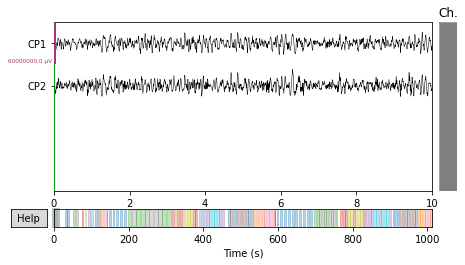

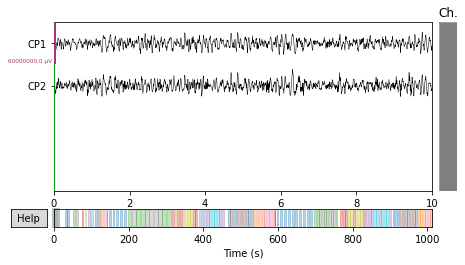

In [7]:
#display raw data

chns = data.info.ch_names

picks = ["CP1", "CP2"]

chn_idxs = []
for chn in picks:
    chn_idxs.append(chns.index(chn))

#apply the bandpass filter

low_fq = 5
hi_fq = 40

crpd_data = data.crop(2)
cd_fd_data = data.filter(5, 50)
    
cd_fd_data.plot(scalings="30", order=chn_idxs, n_channels=4, event_color={1 : "white"}) #How do I make this interactive; seems to work now

### Display Alpha-Waves on a Spectrogram

In [7]:
ants = [i["description"] for i in data.annotations]
novel_ants = []
for i in range(len(ants)):
    if ants[i] in ants:
        if ants[i] not in novel_ants:
            novel_ants.append(ants[i])
        continue
        
print(len(novel_ants))

13


In [8]:
epoch_type = "TMI-a"
event_idT = "True-" + epoch_type + "-"
event_idF = "False-" + epoch_type + "-"

f1, f2 = mdp.get_epochs(epoch_type, data, nperseg=2000, noverlap=1800, channels=picks) #f1_empty should be empty in the case of alpha waves (there are no false alpha wave trials); only look at f2

Used Annotations descriptions: ['False-TMI-a-']
11 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 11 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-TMI-a-']
11 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 11 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


In [9]:
f2

## Print True Trials

In [10]:
# The frequency for True is currently set to 10 
#     (used to be 7)

for z in range(len(f2.specs)):
    print("Annotation: " + event_idT)
    print("Looking at f2 " + str(z))
    mdp.plot_spectrogram(f2.ts[z], f2.fs[z], f2.specs[z])

Annotation: True-TMI-a-
Looking at f2 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 1


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 2


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 3


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 4


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 6


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 7


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 8


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 9


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: True-TMI-a-
Looking at f2 10


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Print False Trials

In [11]:
# The frequency for True is currently set to 15 
#     (used to be 12)

for z in range(len(f1.specs)):
    print("Annotation: " + event_idF)
    print("Looking at f1 " + str(z))
    mdp.plot_spectrogram(f1.ts[z], f1.fs[z], f1.specs[z])

Annotation: False-TMI-a-
Looking at f1 0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 1


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 2


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 3


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 4


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 6


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 7


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 8


C:\Users\Owner\Documents\GitHub\openbci_laryngeal_imagery\code\Modularized_Data_Processing.py:246: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(5, 5))


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 9


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotation: False-TMI-a-
Looking at f1 10


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Show data channel by channel to isolate bad channels

# Actual Motor Imagery CSP

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

tmin, tmax = -1., 4.
event_id = dict(hands=0, feet=1)
subject = 1
runs = [6, 10, 14]  # motor imagery: hands vs feet




raw_fnames = eegbci.load_data(subject, runs)


# raw_fnames = FILE


# I need to get raw objects to give to concatenate_raws

# raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
raw = data
eegbci.standardize(raw)  # set channel names
montage = make_standard_montage('standard_1005')
raw.set_montage(montage)

# strip channel names of "." characters
raw.rename_channels(lambda x: x.strip('.'))

# Apply band-pass filter
raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')



events, _ = events_from_annotations(raw, event_id={event_idT:0, event_idF:1}) #not sure why the type for event_idT or F is incorrect, maybe it has to be a dictionary 

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)
epochs_train = epochs.copy().crop(tmin=1., tmax=2.)
labels = epochs.events[:, -1]

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (1.651 sec)

Used Annotations descriptions: ['False-TMI-a-', 'True-TMI-a-']
22 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 22 events and 5001 original time points ...
0 bad epochs dropped


In [13]:
scores = []
epochs_data = epochs.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)

plt.show(csp.plot_patterns(epochs.info, ch_type='eeg', units='Patterns (AU)', size=1.5))

Computing rank from data with rank=None
    Using tolerance 12 (2.2e-16 eps * 16 dim * 3.4e+15  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.8 (2.2e-16 eps * 16 dim * 1.6e+15  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 12 (2.2e-16 eps * 16 dim * 3.5e+15  max singular value)
    Estimated rank (mag): 16
    MAG: rank 16 computed from 16 data channels with 0 projectors
Reducing data rank from 16 -> 16
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.4 (2.2e-16 eps * 16 dim * 1.2e+15  max singular value)
    Estimated rank

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …